In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('ers.csv')

In [4]:
df = df.sort_values(by='DATE', ascending=True)

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.tail(5)

,DATE,DEXUSEU,DEXUSUK,DEXJPUS,USD to JPY,USD to EUR,USD to GBP
6575,2024-03-18,1.0886,1.2736,149.13,0.006706,1.0886,1.2736
6576,2024-03-19,1.0859,1.2713,150.73,0.006634,1.0859,1.2713
6577,2024-03-20,1.0856,1.2713,151.66,0.006594,1.0856,1.2713
6578,2024-03-21,1.0861,1.2670,151.59,0.006597,1.0861,1.2670
6579,2024-03-22,1.0817,1.2603,151.35,0.006607,1.0817,1.2603


In [7]:
# Convert 'DATE' to datetime format if not already done.
df['DATE'] = pd.to_datetime(df['DATE'])

# Ensuring the exchange rate columns are floats.
df['DEXJPUS'] = pd.to_numeric(df['DEXJPUS'], errors='coerce')
df['DEXUSEU'] = pd.to_numeric(df['DEXUSEU'], errors='coerce')
df['DEXUSUK'] = pd.to_numeric(df['DEXUSUK'], errors='coerce')

In [8]:
df['USD to JPY'] = 1 / df['DEXJPUS']  # Invert JPY to USD to get USD to JPY
df['USD to EUR'] = df['DEXUSEU']  # USD to EUR is already correct
df['USD to GBP'] = df['DEXUSUK']  # USD to GBP is already correct

In [10]:
min_date_eur = df[df['USD to EUR'].notnull()]['DATE'].min()

# Drop rows in the DataFrame where 'DATE' is less than the minimum date of 'USD to EUR'.
df = df[df['DATE'] >= min_date_eur]

In [16]:
# df.drop(['DEXJPUS','DEXUSEU','DEXUSUK'], axis=1, inplace=True)
df.to_csv('ers_updated.csv', index=False)

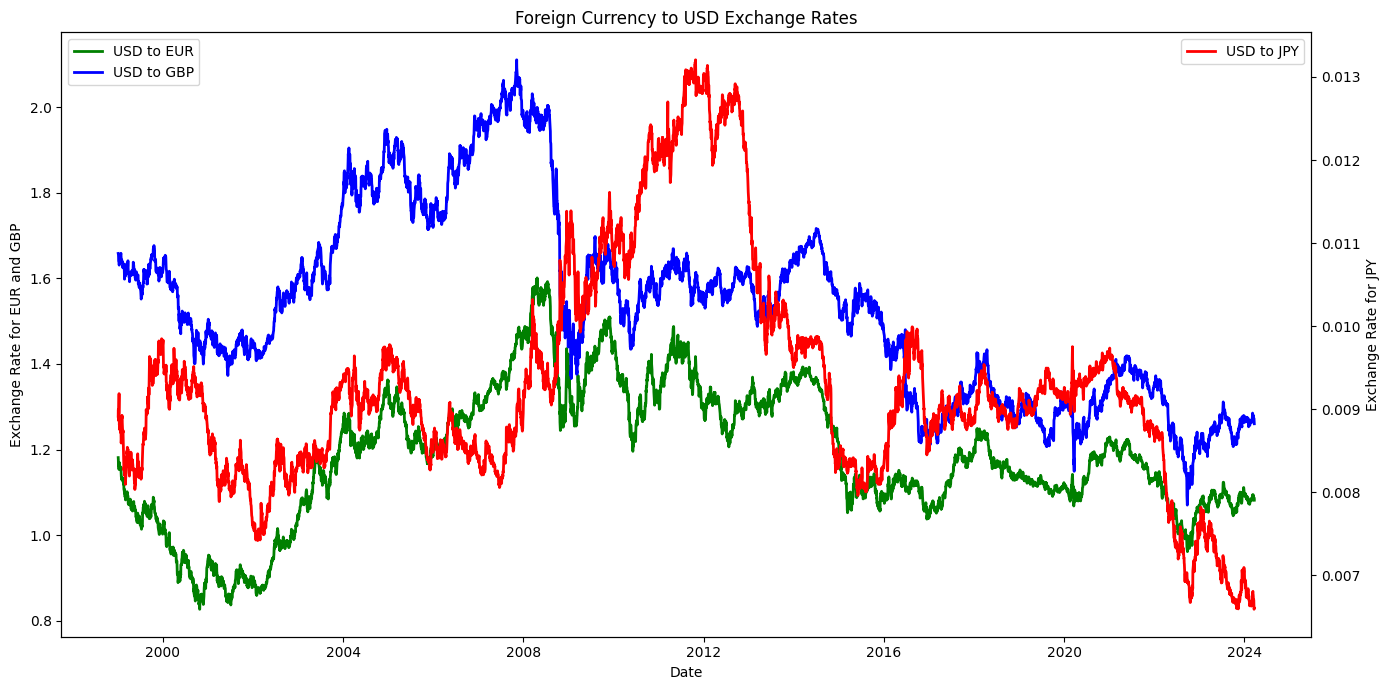

In [44]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the first two lines (EUR and GBP) on the first axis
ax1.plot(df['DATE'], df['USD to EUR'], color='g', label='USD to EUR', linewidth=2)
ax1.plot(df['DATE'], df['USD to GBP'], color='b', label='USD to GBP', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Exchange Rate for EUR and GBP')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a second y-axis for the JPY line
ax2 = ax1.twinx()
ax2.plot(df['DATE'], df['USD to JPY'], color='r', label='USD to JPY', linewidth=2)
ax2.set_ylabel('Exchange Rate for JPY')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Title and other settings
plt.title("Foreign Currency to USD Exchange Rates")
fig.tight_layout()  # Adjust the padding between and around subplots
plt.show()


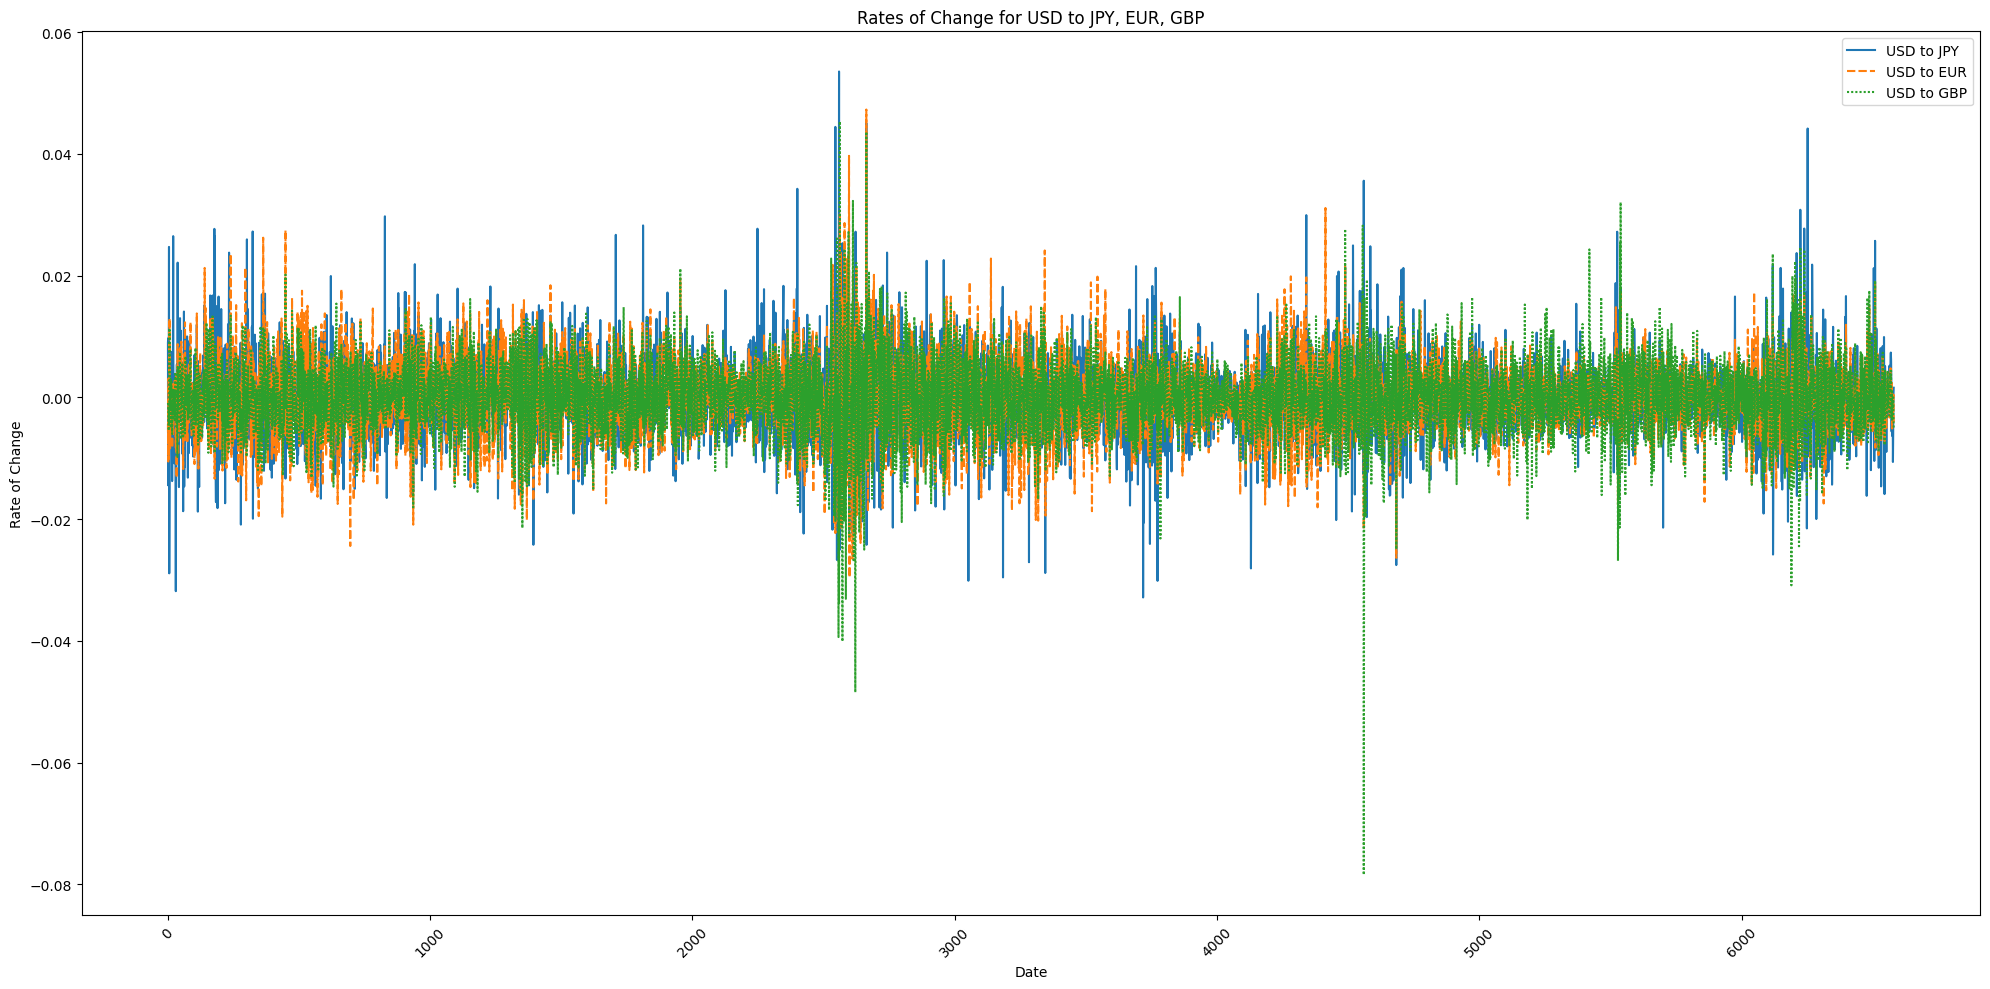

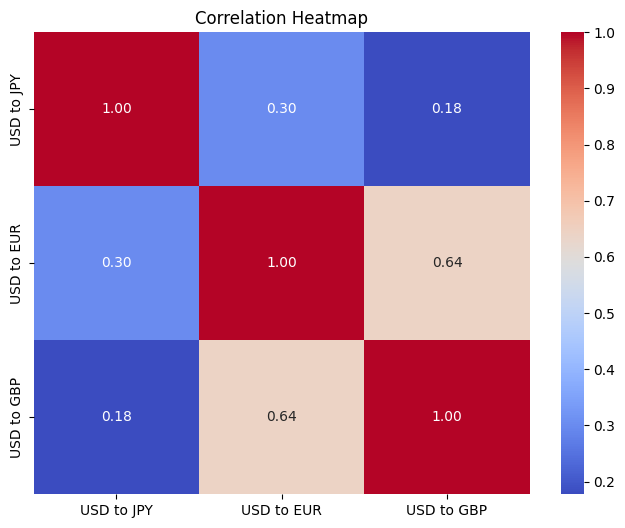

In [50]:
ddf_rates_of_change = df[['USD to JPY', 'USD to EUR', 'USD to GBP']].pct_change().dropna()

# Plotting the rates of change
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_rates_of_change)
plt.title('Rates of Change for USD to JPY, EUR, GBP')
plt.xlabel('Date')
plt.ylabel('Rate of Change')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

# Calculating the correlation matrix
correlation_matrix = df_rates_of_change.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()